In [11]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Next step inolves loading and preprocessing the dataset

In [26]:
ft_names=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=ft_names)
display(df)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [13]:
#preprocessing the data
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [14]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


Determining the output or targets for this classification problem

In [15]:
#the expected outcome id to be either a gamma ray denoted by g or hadron denoted by h
df['class'].unique()

array(['g', 'h'], dtype=object)

In [47]:
#next we are going to encode the outputs to a numerical format which can best be used by the algorithms.
#To do this we are going to work with boolean variables in which if the outcome is a gamma ray then the
# output would be true denoted by 1 and if its hadron, then it would be false denoted by 0 
df['class'] = (df['class'].astype(str) == "g").astype(int)

In [48]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


Data visualisation

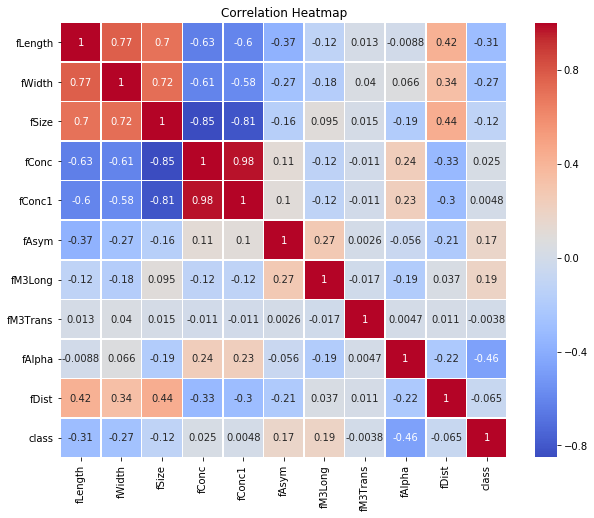

In [49]:
#The very first visualization will be a heatmap which can help us see how the feaures in 
#our data correlate to one another
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


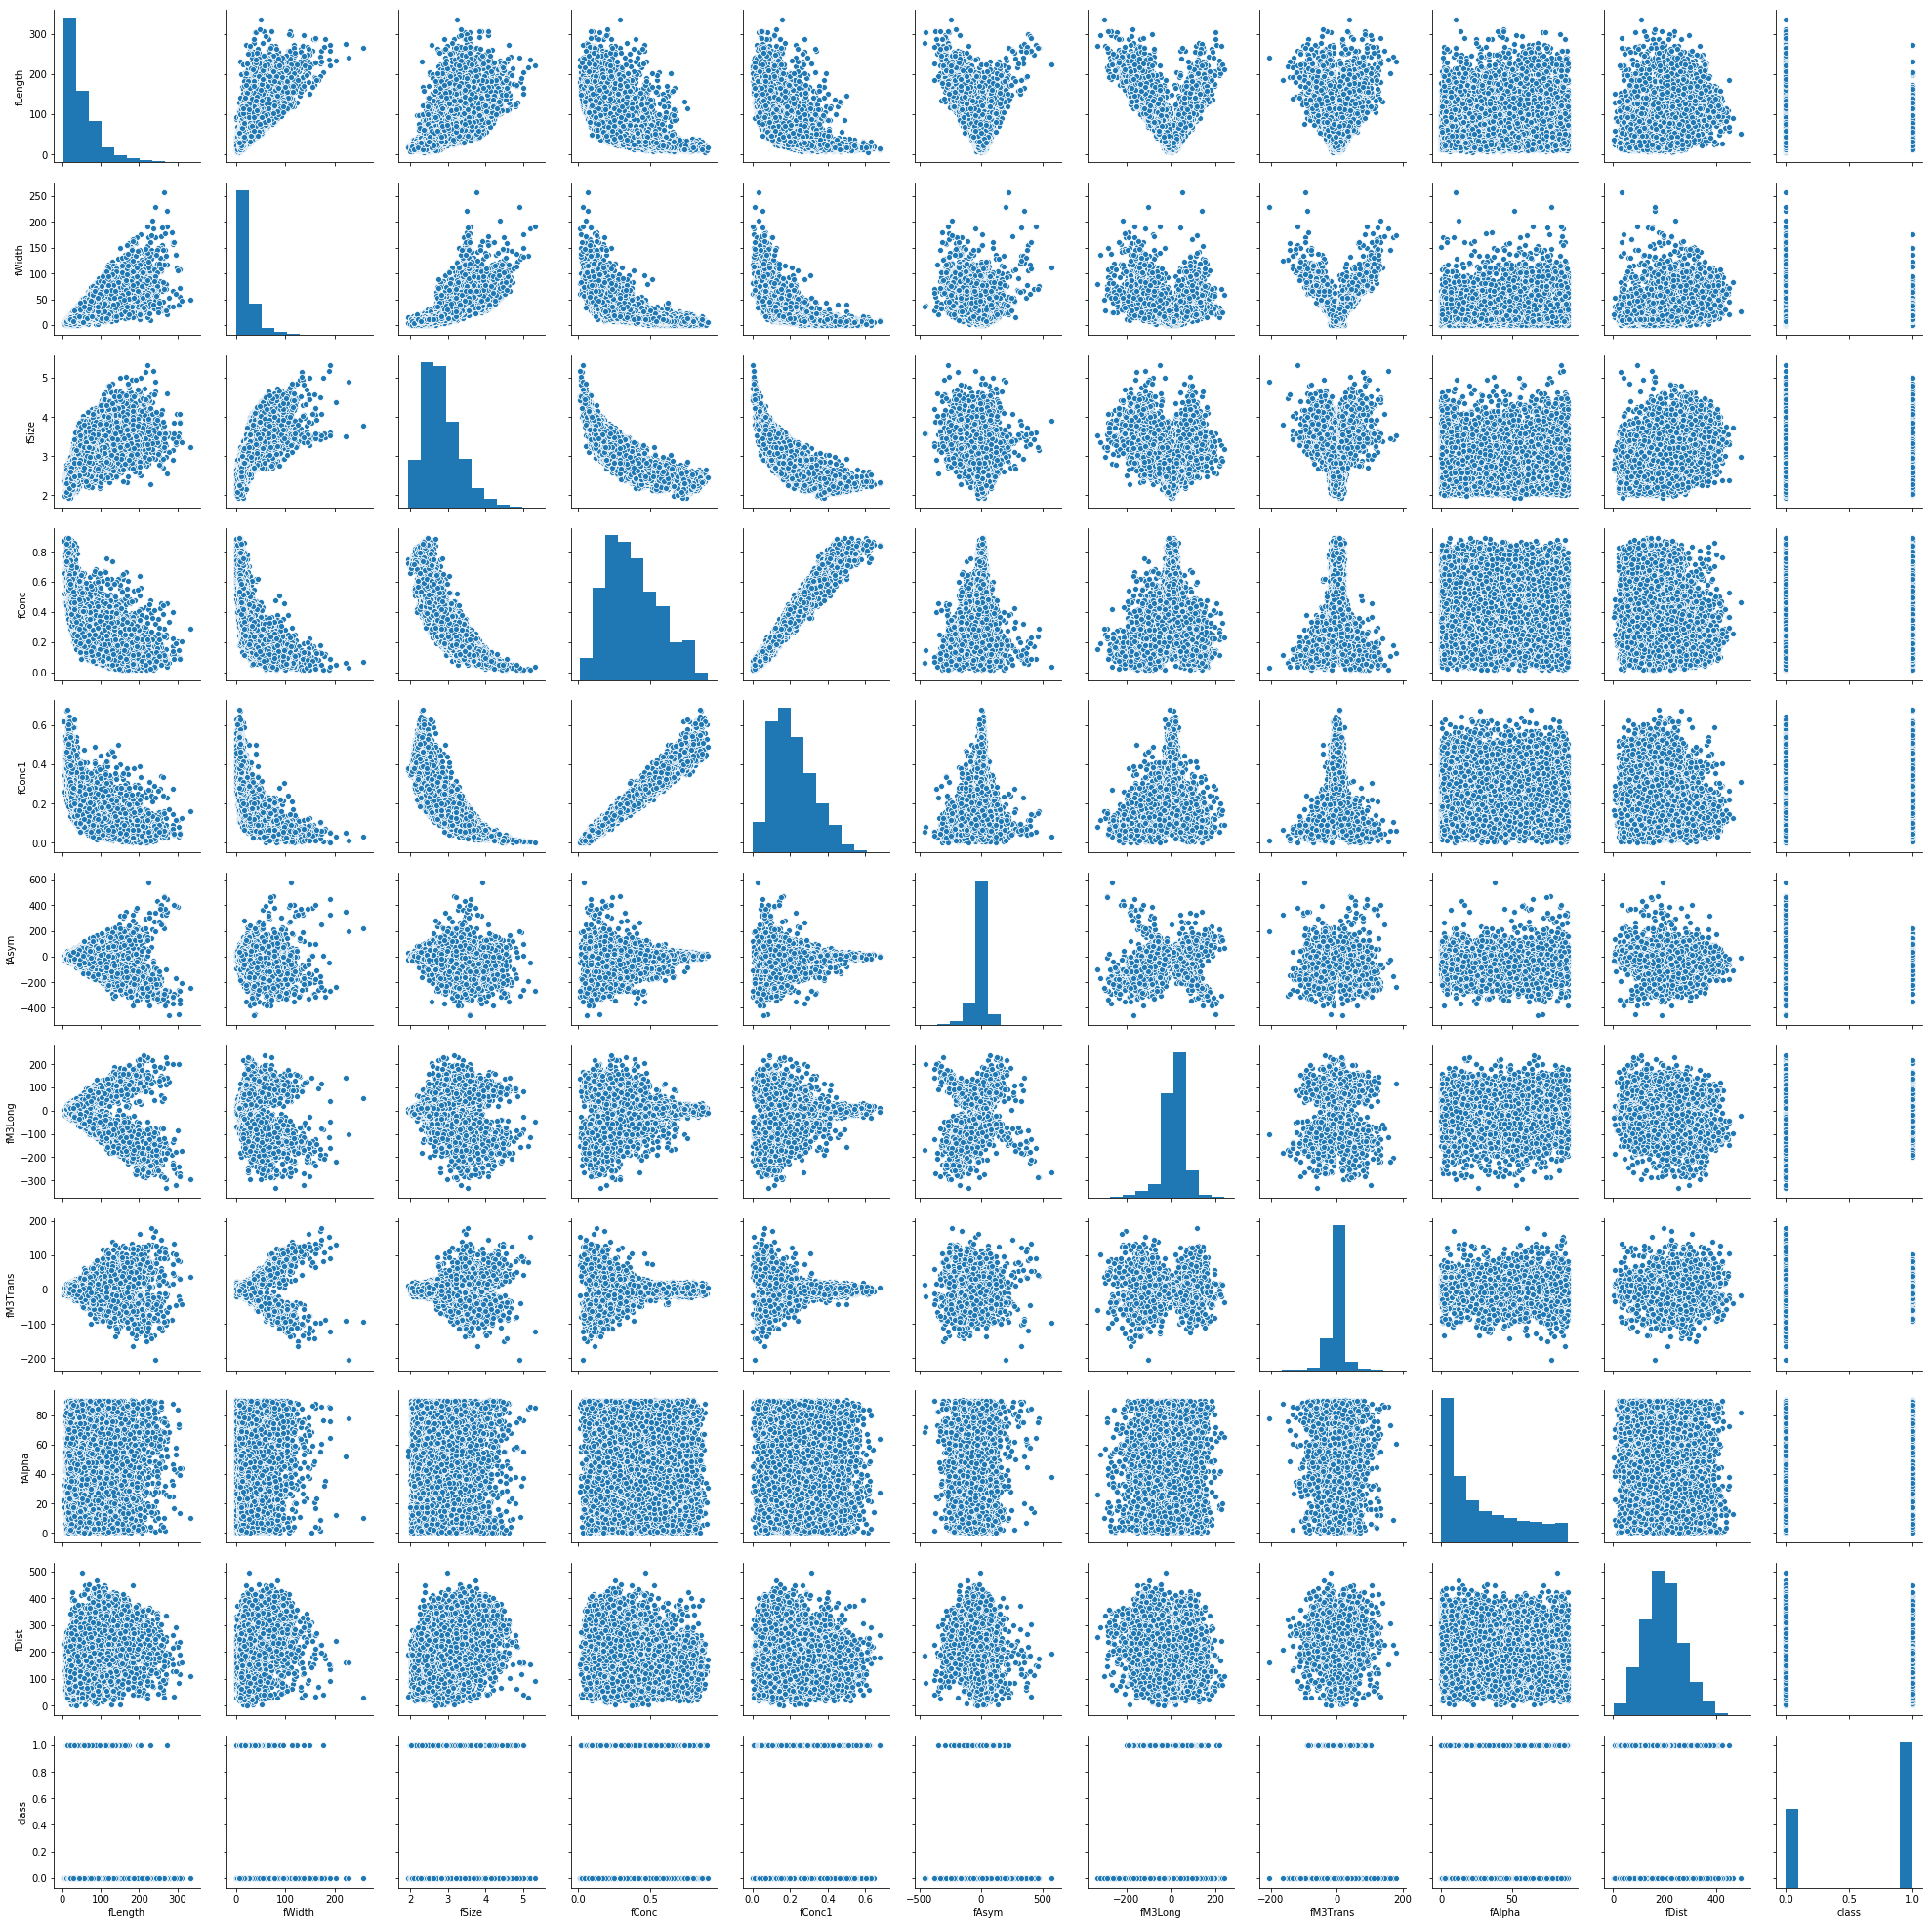

In [50]:
#The next visualization tool will be the pairplot
#The reason for using a pair plot is because it continously creates pairs among
#all continous features in the dataset and creates scatter plots for all of them so we get to
#see how they relate to each other.
# Create a pairplot
sns.pairplot(df)
plt.show()


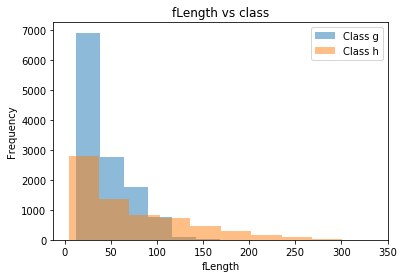

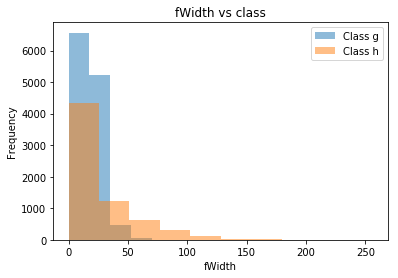

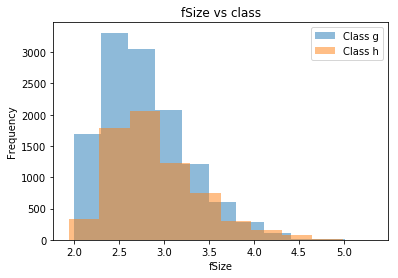

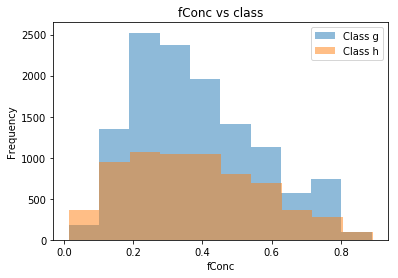

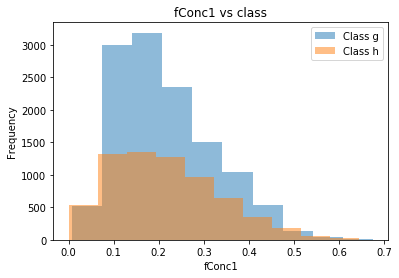

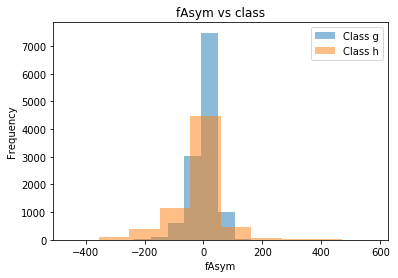

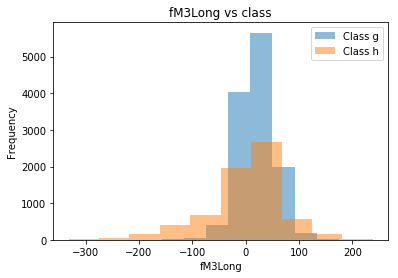

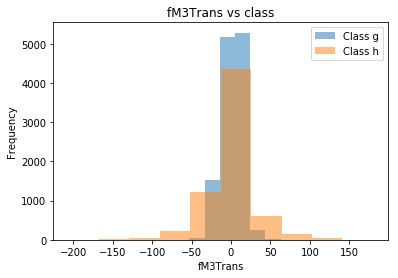

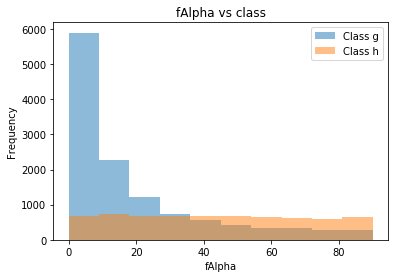

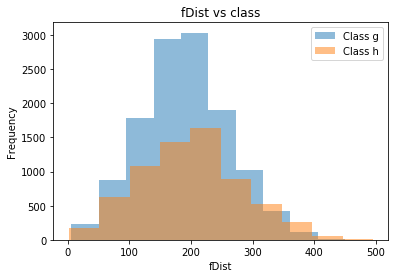

In [37]:
#The next visualization is a histogram showing how each feature affects the target variable.
import matplotlib.pyplot as plt
classes = df['class'].unique()
# Loop through each feature and create histograms
for feature in df.columns:
    if feature != 'class':  # Exclude the target variable itself
        plt.figure()
        for cls in classes:
            plt.hist(df[df['class'] == cls][feature], bins=10, alpha=0.5, label=f"Class {cls}")
        plt.title(f"{feature} vs class")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()


Splitting the dataset into train, validation and testing sets and also performing scaling on the features to transorm and nomarlize them

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

In [52]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Splitting the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [54]:
# Performing feature scaling on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [55]:
# Applying the same scaling to the validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Implementation of the models. This will be done using KNN algorithm, Niave bayes classifier and the support vector mavhines

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


KNN Algorithm

In [57]:
# Training the KNN model with the 2 neighbours
knn.set_params(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [58]:

# Evaluating the KNN model
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_score_knn)

KNN Accuracy: 0.7565720294426919
KNN Precision: 0.8604323308270677
KNN Recall: 0.7443089430894309
KNN F1 Score: 0.7981691368788143


Naive Bayes classifier

In [59]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None)

In [60]:
# Evaluating the Naive Bayes model
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)
print("Naive Bayes F1 Score:", f1_score_nb)

Naive Bayes Accuracy: 0.7266035751840169
Naive Bayes Precision: 0.7297734627831716
Naive Bayes Recall: 0.9166666666666666
Naive Bayes F1 Score: 0.8126126126126128


RandomForestClassifier

In [62]:
rf = RandomForestClassifier(n_estimators=100)  
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
# Evaluating the Naive Bayes model
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_nb)
precision_rf = precision_score(y_test, y_pred_nb)
recall_rf = recall_score(y_test, y_pred_nb)
f1_score_rf = f1_score(y_test, y_pred_nb)

print("RandomForestClassifier:", accuracy_rf)
print("RandomForestClassifier:", precision_rf)
print("RandomForestClassifier:", recall_rf)
print("RandomForestClassifier:", f1_score_rf)

RandomForestClassifier: 0.7266035751840169
RandomForestClassifier: 0.7297734627831716
RandomForestClassifier: 0.9166666666666666
RandomForestClassifier: 0.8126126126126128
